In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df = pd.read_csv("/kaggle/input/placement/placement.csv")
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [6]:
df = df.iloc[:,1:]

In [7]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [8]:
import matplotlib.pyplot as plt

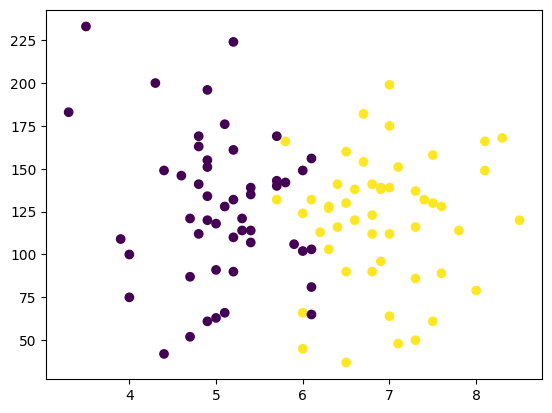

In [10]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [11]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [12]:
x = df.iloc[:,0:2]

In [13]:
y = df.iloc[:,-1]

In [16]:
x.shape

(100, 2)

In [18]:
y.shape

(100,)

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1)

In [21]:
x_train

,cgpa,iq
34,4.8,163.0
65,8.1,166.0
95,4.3,200.0
37,8.1,149.0
36,5.7,140.0
...,...,...
2,5.3,121.0
42,7.6,89.0
22,4.9,120.0
57,6.5,130.0


In [22]:
y_train

34    0
65    1
95    0
37    1
36    0
     ..
2     0
42    1
22    0
57    1
30    1
Name: placement, Length: 90, dtype: int64

In [23]:
x_test

,cgpa,iq
99,6.2,113.0
29,7.0,112.0
24,4.7,121.0
7,5.0,63.0
40,4.9,134.0
31,3.9,109.0
82,6.5,37.0
63,6.3,128.0
98,6.3,103.0
72,7.3,116.0


In [24]:
y_test

99    1
29    1
24    0
7     0
40    0
31    0
82    1
63    1
98    1
72    1
Name: placement, dtype: int64

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [27]:
x_train = scaler.fit_transform(x_train)

In [29]:
x_test = scaler.transform(x_test)
x_test

array([[ 0.16495683, -0.31859333],
       [ 0.86359753, -0.34348343],
       [-1.14499448, -0.1194725 ],
       [-0.88300422, -1.56309852],
       [-0.9703343 ,  0.20409885],
       [-1.84363518, -0.41815375],
       [ 0.42694709, -2.21024123],
       [ 0.25228692,  0.05475823],
       [ 0.25228692, -0.56749437],
       [ 1.12558779, -0.24392302]])

In [31]:
from sklearn.linear_model import LogisticRegression

In [33]:
clf = LogisticRegression()

In [36]:
clf.fit(x_train,y_train)

LogisticRegression()

In [39]:
y_pred = clf.predict(x_test)

In [40]:
y_test

99    1
29    1
24    0
7     0
40    0
31    0
82    1
63    1
98    1
72    1
Name: placement, dtype: int64

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
accuracy_score(y_pred,y_test)

1.0

In [44]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

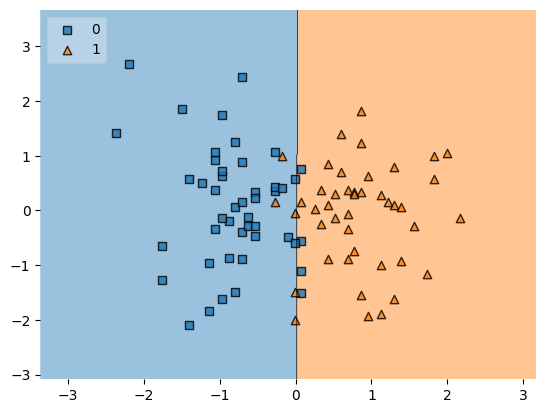

In [46]:
plot_decision_regions(x_train, y_train.values,
                                clf=clf, legend=2)

In [47]:
import pickle

In [48]:
pickle.dump(clf,open('model.pkl','wb'))